In [32]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rates import Isotope, Reaclib

plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')
plt.style.use('seaborn-colorblind')

reaclib_ppn = Reaclib(version="PPN_2")

reaclib = Reaclib(version="2")

In [33]:
df = pd.read_csv("uncertainties.csv")
df.head()

,Isotope,Element,Mass,MaxLDensity,MaxGStrength,MaxRate,Charge,Neutron,MaxFactor,MinLDensity,MinGStrength,MinRate,MinFactor,ExperimentalUncert(%)
0,12C,C,12,-1,-1,166.000000,6,6,NaN,-1,-1,166.000000,NaN,7.685185
1,13C,C,13,-1,-1,451.000000,6,7,NaN,-1,-1,451.000000,NaN,10.464037
2,14C,C,14,-1,-1,105.000000,6,8,NaN,-1,-1,105.000000,NaN,8.333333
3,15C,C,15,4,3,9044.870000,6,9,49.272093,0,0,183.569837,1.000000,NaN
4,16C,C,16,0,0,127.416985,6,10,1.000000,4,1,2.147940,0.016858,NaN


In [34]:
isos = ['AL 27-factor',
 'AR 38-factor',
 'AR 39-factor',
 'AR 40-factor',
 'AR 41-factor',
 'AR 42-factor',
 'CA 48-factor',
 'CL 37-factor',
 'CL 38-factor',
 'CL 39-factor',
 'MG 26-factor',
 'MG 27-factor',
 'NA 23-factor',
 'NE 20-factor',
 'NE 22-factor',
 'P  31-factor',
 'S  35-factor',
 'S  36-factor',
 'SI 28-factor',
 'SI 30-factor',
 'SI 31-factor',
 'SI 32-factor']

AL 27
AR 38
AR 39
AR 40
AR 41


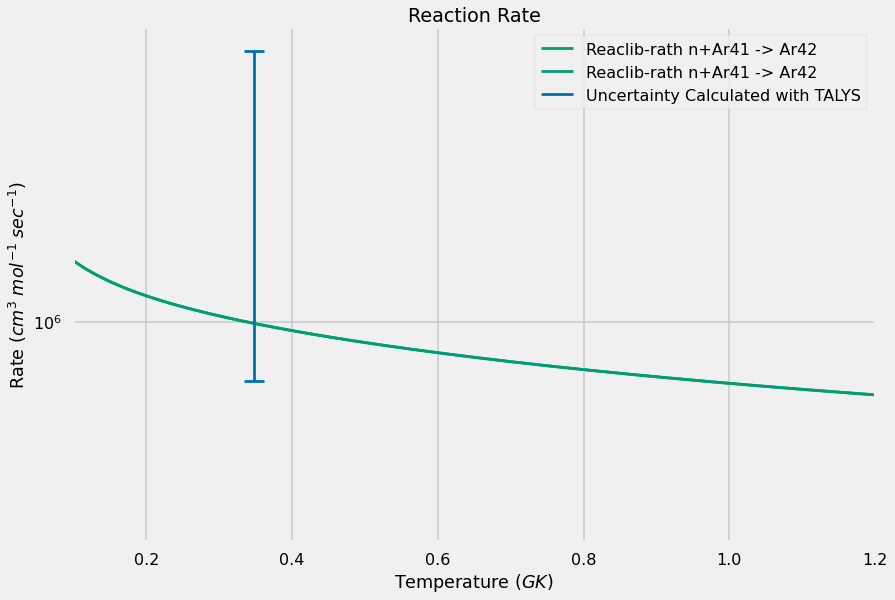

AR 42


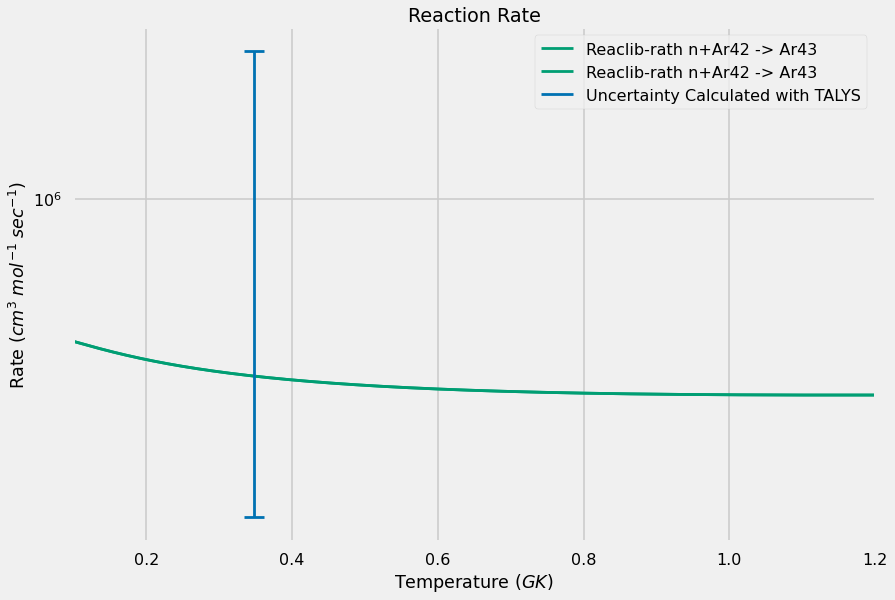

CA 48
CL 37
CL 38


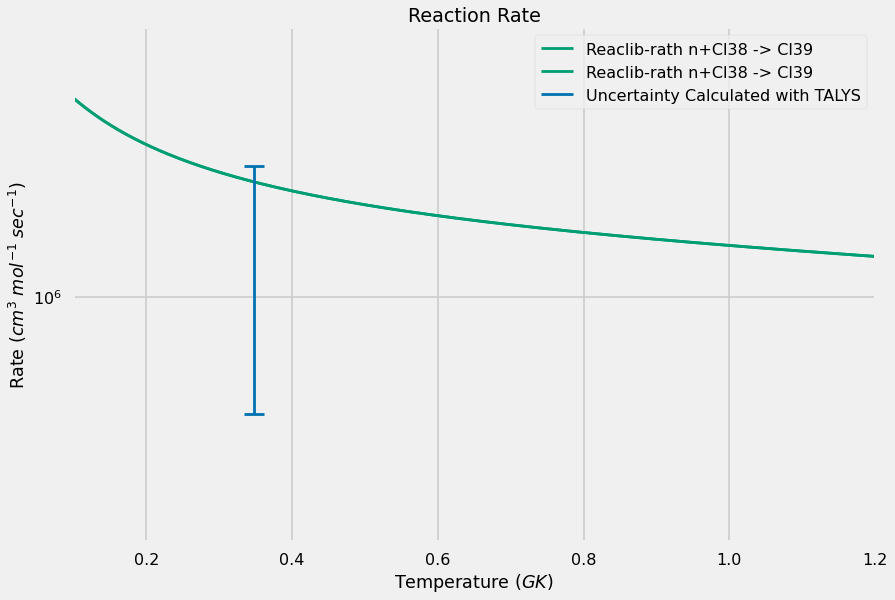

CL 39


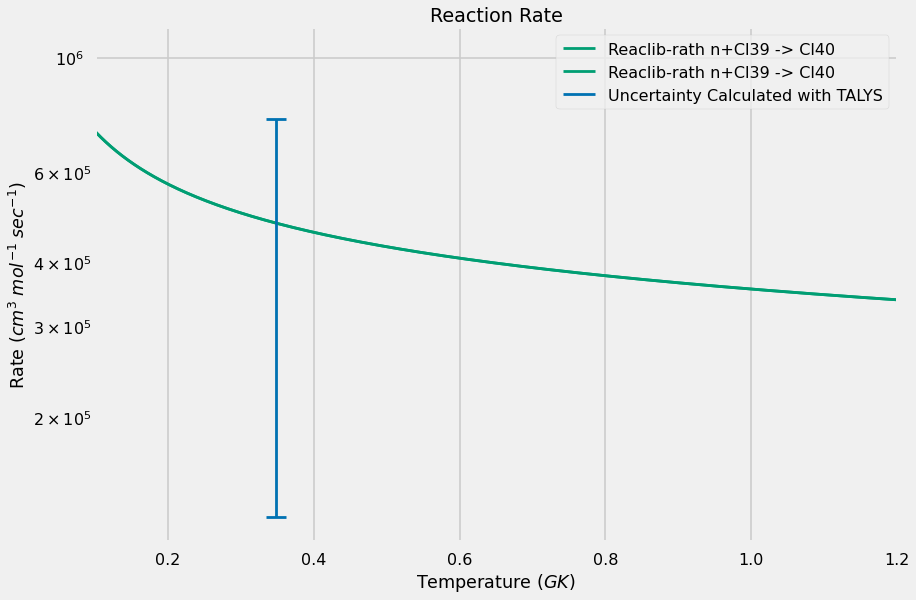

MG 26
MG 27


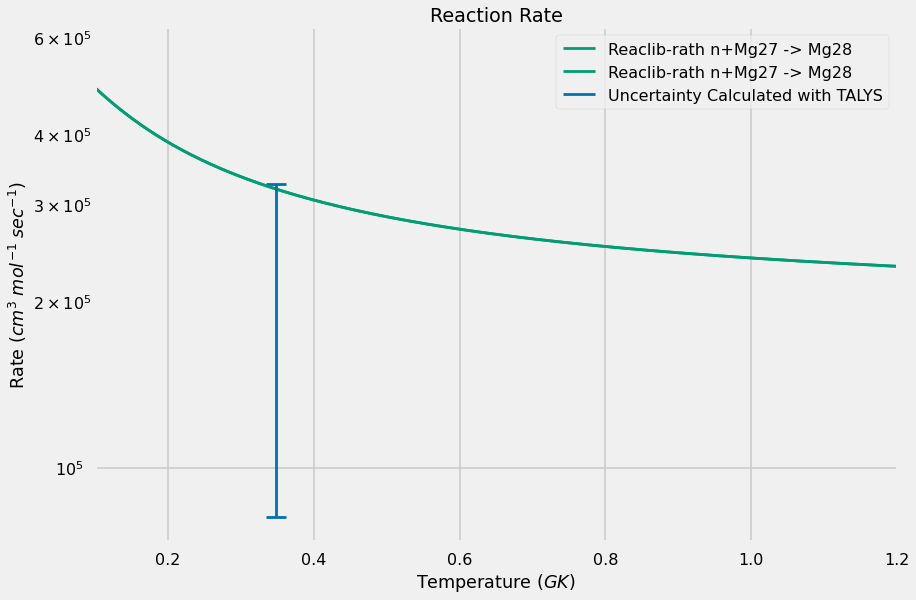

NA 23
NE 20
NE 22
P  31
S  35


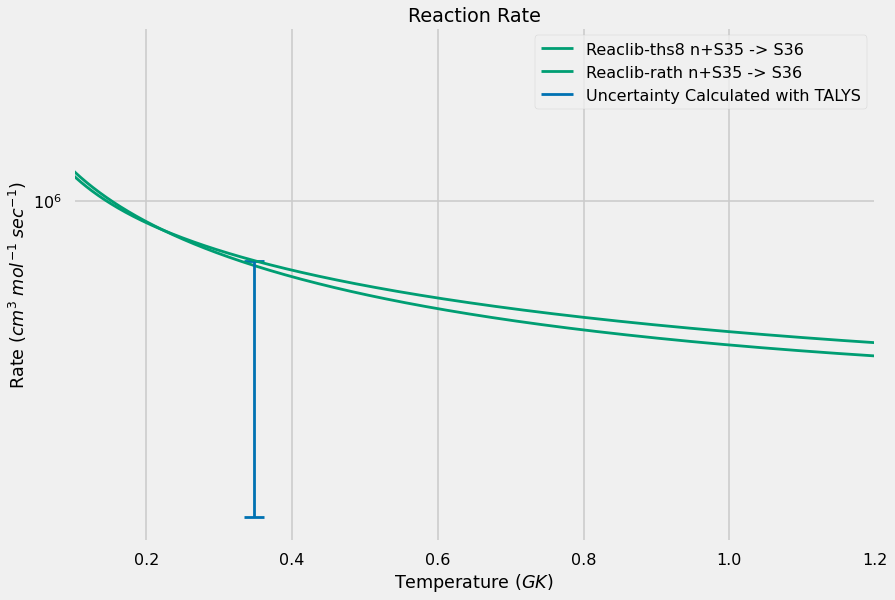

S  36
SI 28
SI 30
SI 31


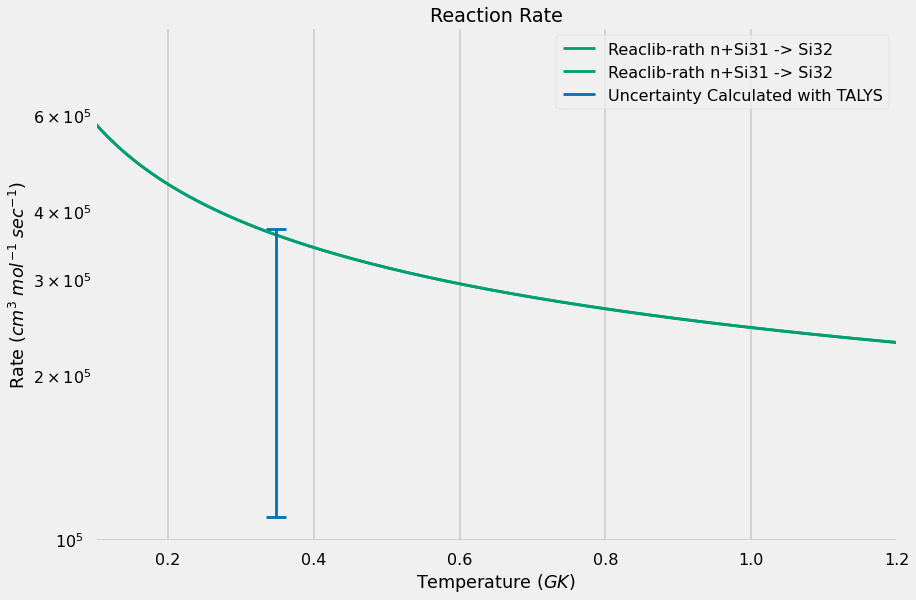

SI 32


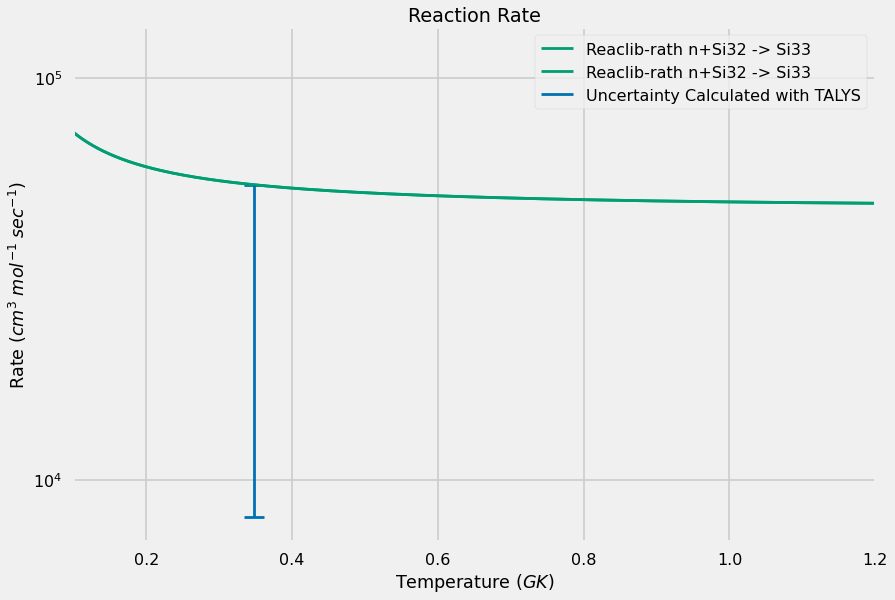

In [74]:

for iso in isos:
    iso = iso[0:5]
    print(iso)
    if reaclib_ppn.get_n_gamma(iso).label != "ka02":
        ax = reaclib.get_n_gamma(iso).mpl_plot(temp_unit='GK')
        ax = reaclib_ppn.get_n_gamma(iso).mpl_plot(ax=ax, temp_unit='GK')
        
        element = iso[0:2].capitalize().strip()
        mass = iso[2:].strip()
        
        iso = mass + element
        
        ax.plot([0.348, 0.348],
                [float(df[df.Isotope == iso].MaxRate), float(df[df.Isotope == iso].MinRate)],
                c = "C0",
                label="Uncertainty Calculated with TALYS")
        
        ax.scatter([0.348, 0.348],
                [float(df[df.Isotope == iso].MaxRate), float(df[df.Isotope == iso].MinRate)],
                marker="_",
                s=400,
                c = "C0")
        
        ax.set_xlim(0.1,1.2)
        ax.set_xscale("linear")
        plt.legend()
        plt.show()